In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("startup_funding.csv")

In [3]:
data.shape

(2372, 10)

In [4]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN
1,1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02-08-2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02-08-2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"5,00,000",NaN
4,4,02-08-2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"8,50,000",NaN


In [5]:
data.drop(['SNo','Remarks'], axis=1, inplace=True)

In [6]:
data = data.fillna('Data Unavailable')

# Fundings in each year!

In [619]:
data['Date'] = pd.to_datetime(data['Date'])


In [617]:
data['year'] = pd.DatetimeIndex(data['Date']).year

In [618]:
data['year'].value_counts()

2016    993
2015    936
2017    443
Name: year, dtype: int64

In [253]:
year = list(data['year'].value_counts().keys())
fundings = list(data['year'].value_counts())

In [254]:
year[0], year[1]=year[1], year[0]

In [255]:
year

[2015, 2016, 2017]

In [256]:
fundings[0], fundings[1] = fundings[1], fundings[0]

In [257]:
fundings

[936, 993, 443]

In [258]:
dic = dict(zip(year, fundings))
for i in dic:
    print(i,'',dic[i])

2015  936
2016  993
2017  443


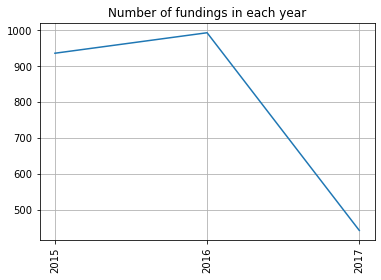

In [259]:
plt.plot(year,fundings)
plt.grid()
plt.xticks(year, rotation='vertical')
plt.title('Number of fundings in each year')
plt.show()

# No. of startups in each city

In [260]:
data['City'] = data['CityLocation']

In [261]:
 top_cities = data['City'].value_counts().drop('Data Unavailable')[0:10]

In [262]:
top_cities

Bangalore    628
Mumbai       446
New Delhi    385
Gurgaon      240
Pune          84
Noida         78
Hyderabad     76
Chennai       66
Ahmedabad     35
Jaipur        25
Name: City, dtype: int64

In [263]:
cities = list(top_cities.keys())
startups = list(top_cities)

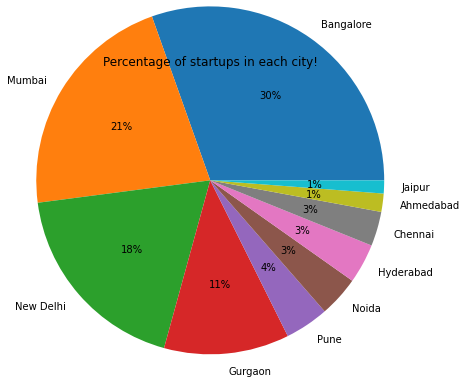

In [264]:
plt.title('Percentage of startups in each city!')
plt.pie(startups, labels = cities, radius=2, autopct='%0.1d%%')

plt.show()

In [265]:
#data['City'].value_counts()[10:60]

# Top cities with most amount of fundings received

In [266]:
df = data.loc[(data['AmountInUSD'] != 'Data Unavailable' ),['CityLocation','AmountInUSD']]

In [267]:
df2 = df['CityLocation'].value_counts().drop('Data Unavailable')[0:10]
df2

Bangalore    406
Mumbai       300
New Delhi    213
Gurgaon      165
Pune          54
Hyderabad     53
Chennai       47
Noida         45
Ahmedabad     25
Jaipur        10
Name: CityLocation, dtype: int64

In [268]:
top_cities = list(df2.keys())
no_of_fundings = []

# for counting multiple values

for i in top_cities:
    df3 = data.loc[(data['CityLocation'].str.startswith(i)) & (data['AmountInUSD'] != 'Data Unavailable'),['CityLocation','AmountInUSD']].shape[0]
    no_of_fundings.append(df3)    

In [269]:
top_cities

['Bangalore',
 'Mumbai',
 'New Delhi',
 'Gurgaon',
 'Pune',
 'Hyderabad',
 'Chennai',
 'Noida',
 'Ahmedabad',
 'Jaipur']

In [270]:
no_of_fundings

[413, 303, 215, 166, 60, 54, 47, 46, 25, 10]

In [271]:
dic1 = dict(zip(top_cities, no_of_fundings))
for i in dic1:
    j = (dic1[i]*100)/np.sum(no_of_fundings)
    print(i,'','%.2f' %  j)                      # using '%.2f' % for rounding values to 2 decimal

Bangalore  30.84
Mumbai  22.63
New Delhi  16.06
Gurgaon  12.40
Pune  4.48
Hyderabad  4.03
Chennai  3.51
Noida  3.44
Ahmedabad  1.87
Jaipur  0.75


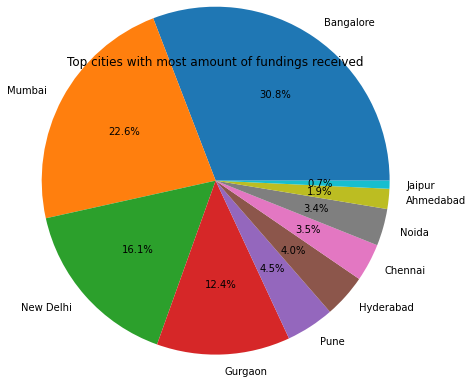

In [640]:
plt.pie(no_of_fundings, labels=top_cities, radius = 2, autopct='%0.1f%%')
plt.title('Top cities with most amount of fundings received')

plt.show()

# Percentage of amount funded for each investment type

In [273]:
df4 = data.loc[(data['AmountInUSD'] != 'Data Unavailable'),['InvestmentType', 'AmountInUSD']]

In [274]:
df4

,InvestmentType,AmountInUSD
0,Private Equity,"13,00,000"
3,Seed Funding,"5,00,000"
4,Seed Funding,"8,50,000"
5,Seed Funding,"10,00,000"
6,Private Equity,"26,00,000"
...,...,...
2366,Private Equity,"25,00,000"
2367,Private Equity,"45,00,000"
2368,Private Equity,"8,25,000"
2369,Private Equity,"15,00,000"


In [275]:
# As there are four types of investments

df4['InvestmentType'].value_counts()

Private Equity    827
Seed Funding      672
SeedFunding        22
Debt Funding        1
PrivateEquity       1
Crowd funding       1
Crowd Funding       1
Name: InvestmentType, dtype: int64

In [279]:
amt_details = []
for i in list(df4['AmountInUSD']):
    amt_details.append(int(i.replace(',','')))

In [293]:
tot = 0
for z in amt_details:
    tot = z + tot

total_amt_invested = tot
tot

18347386476

In [291]:
type_of_funding = ['Private Equity', 'Seed Funding', 'Debt Funding', 'Crowd Funding']
each_type_fund_value = []
number_of_each_fund = []
for i in type_of_funding:
    df5 = df4.loc[(df4['InvestmentType'].str.startswith(i[0]))]
    total_fund = 0
    number_of_each_fund.append(df5.shape[0])
    for j in list(df5['AmountInUSD']):
        total_fund = total_fund + int(j.replace(',',''))
    
    each_type_fund_value.append(total_fund)
    

In [292]:
print(type_of_funding)
print(number_of_each_fund)
print(each_type_fund_value)

['Private Equity', 'Seed Funding', 'Debt Funding', 'Crowd Funding']
[828, 694, 1, 2]
[18007085000, 332345708, 7800000, 155768]


In [294]:
dic2 = dict(zip(type_of_funding, each_type_fund_value))
for i in dic2:
    j = (dic2[i]*100)/tot
    print(i,'','%.2f' % j)

Private Equity  98.15
Seed Funding  1.81
Debt Funding  0.04
Crowd Funding  0.00


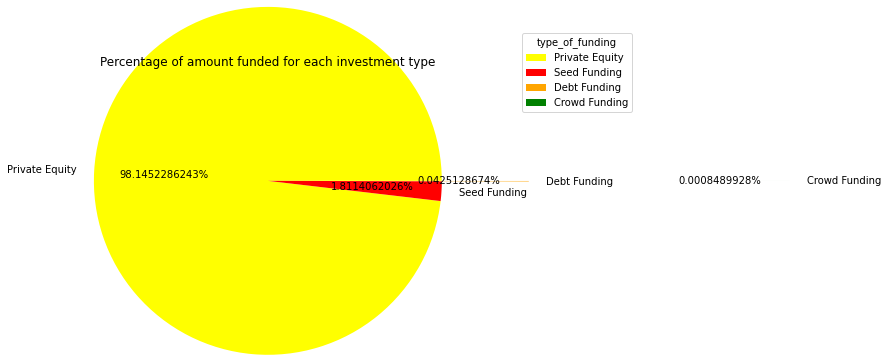

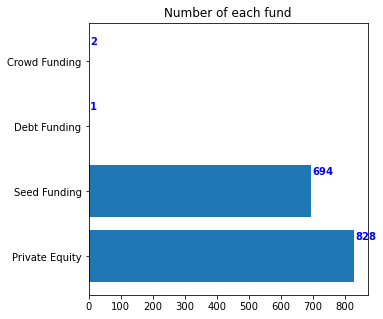

In [645]:
myexplode = [0, 0, 1, 4]
plt.pie(each_type_fund_value, labels = type_of_funding, radius = 2, autopct='%0.10f%%', explode = myexplode, colors=['yellow','red','orange','green'])
plt.legend(title = 'type_of_funding',loc='right', bbox_to_anchor=(2.2,1.0))
plt.title('Percentage of amount funded for each investment type')

plt.show()

plt.figure(figsize=(5,5))
plt.barh(type_of_funding, number_of_each_fund)
plt.title('Number of each fund')


for i, v in enumerate(number_of_each_fund):
    plt.text(v + 3, i + .25, str(v),
            color = 'blue', fontweight = 'bold')
plt.show()

# Type of companies easily got funding

In [470]:
df6 = data.loc[(data['AmountInUSD'] != 'Data Unavailable'),['IndustryVertical', 'AmountInUSD']]

In [471]:
df7 = df6['IndustryVertical'].value_counts()[0:7].drop('Data Unavailable')

In [472]:
df7

Consumer Internet    461
Technology           189
eCommerce            113
ECommerce             32
Logistics             16
Education             15
Name: IndustryVertical, dtype: int64

In [473]:
top_5_industry = list(df7.keys())
top_5_industry.remove('eCommerce')
top_5_industry[2] = 'Ecommerce'


ecom = df7[2] + df7[3]
count_each_industry_type = list(df7)
del count_each_industry_type[2:4]
count_each_industry_type.insert(2,ecom)


print(top_5_industry)
count_each_industry_type

['Consumer Internet', 'Technology', 'Ecommerce', 'Logistics', 'Education']


[461, 189, 145, 16, 15]

In [495]:
each_industry_funded_value = []
count_of_each_industry_type = []
for i in top_5_industry:
    if i == 'Ecommerce':
        df7 = df6.loc[(df6['IndustryVertical'].str.startswith('ommerce')) | (df6['IndustryVertical'].str.endswith('ommerce'))]
        
    else:
        df7 = df6.loc[(df6['IndustryVertical'].str.startswith(i)) | (df6['IndustryVertical'].str.endswith(i))]
    
    count_of_each_industry_type.append(df7.shape[0])
    total_fund_each_industry = 0
    for j in list(df7['AmountInUSD']):
        total_fund_each_industry = total_fund_each_industry + int(j.replace(',',''))
        
    each_industry_funded_value.append(total_fund_each_industry)
    

In [496]:
print(top_5_industry)
print(each_industry_funded_value)
print(count_of_each_industry_type)

['Consumer Internet', 'Technology', 'Ecommerce', 'Logistics', 'Education']
[3797089000, 1103593500, 4396289608, 445220000, 118583000]
[461, 189, 157, 29, 18]


In [542]:
dic3 = dict(zip(top_5_industry, each_industry_funded_value))
lis = {}
for i in dic3:
    j = (dic3[i]*100)/tot
    lis[i] = j    

lis1 = sorted(lis.items(), key=lambda x:x[1])
for i in range(len(lis1)-1,-1,-1):
    print(lis1[i][0],'', '%.2f' % lis1[i][1])


Ecommerce  23.96
Consumer Internet  20.70
Technology  6.01
Logistics  2.43
Education  0.65


# Top startups with most amount of total funding

In [568]:
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01-08-2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"13,00,000",NaN
1,1,02-08-2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02-08-2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02-08-2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"5,00,000",NaN
4,4,02-08-2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"8,50,000",NaN


In [586]:
df8 = data.loc[(data['AmountInUSD'] != 'Data Unavailable'), ['StartupName','AmountInUSD']]

In [587]:
df8.head()
df8['AmountInUSD'] =df8['AmountInUSD'].fillna('0,0')

In [588]:
df8['StartupName'].value_counts()[0:10]

Ola          9
Swiggy       7
UrbanClap    6
Paytm        6
OYO          6
Medinfi      5
Jugnoo       5
NoBroker     5
Flipkart     5
Niki.ai      4
Name: StartupName, dtype: int64

In [589]:
top_6_startup = ['Ola', 'Swiggy', 'UrbanClap', 'Paytm', 'OYO', 'Flipkart']
each_startup_fund_value = []
number_of_times_each_startup_raises_fund = []
for i in top_6_startup:
    df9 = df8.loc[(df8['StartupName'].str.startswith(i))]
    total_fund_each_startup = 0
    number_of_times_each_startup_raises_fund.append(df9.shape[0])
    for j in list(df9['AmountInUSD']):
        total_fund_each_startup = total_fund_each_startup + int(j.replace(',',''))
    
    each_startup_fund_value.append(total_fund_each_startup)

In [592]:
print(top_6_startup)
print(each_startup_fund_value)
print(number_of_times_each_startup_raises_fund)

['Ola', 'Swiggy', 'UrbanClap', 'Paytm', 'OYO', 'Flipkart']
[1899500000, 170500000, 60700000, 2340000000, 637000000, 2259700000]
[9, 7, 6, 6, 7, 5]


In [601]:
dic4 = dict(zip(top_6_startup, each_startup_fund_value))

lis1 = sorted(dic4.items(), key=lambda x:x[1])
for i in range(len(lis1)-1,-1,-1):
    print(lis1[i][0],'',  lis1[i][1])

Paytm  2340000000
Flipkart  2259700000
Ola  1899500000
OYO  637000000
Swiggy  170500000
UrbanClap  60700000


# Top startups who received funding maxi. times

In [606]:
dic5 = dict(zip(top_6_startup, number_of_times_each_startup_raises_fund))
for i in dic5:
    print(i,'',dic5[i])

Ola  9
Swiggy  7
UrbanClap  6
Paytm  6
OYO  7
Flipkart  5


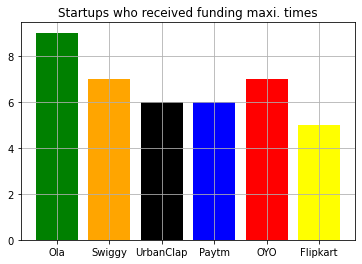

In [646]:
plt.bar(top_6_startup, number_of_times_each_startup_raises_fund,color=['g','orange','black','b','r','yellow'])
plt.title('Startups who received funding maxi. times')

plt.grid(True)
plt.show()

# Top Investors

In [119]:
df10 = data.loc[(data['AmountInUSD'] != 'Data Unavailable'), ['InvestorsName','AmountInUSD','StartupName']]

In [120]:
df10['InvestorsName'].replace('Undisclosed investors', 'Undisclosed Investors', inplace = True)
df10['InvestorsName'].replace('Undisclosed Investors', '', inplace = True)

In [121]:
df11 = df10['InvestorsName']

In [122]:
investors = []
investor_name = []
no_of_times_invested = []
for i in df11:
    df12 = i.strip().split(', ')
    for j in df12:
        investors.append(j)
investors       

for i in range(len(investors)):
    count = 1
    if investors[i] in investor_name:
        pass
    else:
        for j in range(i+1,len(investors)):
            if investors[i] == investors[j]:
                count += 1
            else:
                pass
        if count > 25:
            investor_name.append(investors[i])
            no_of_times_invested.append(count)
        else:
            pass

print(investor_name)
print(no_of_times_invested)

['Kalaari Capital', 'Accel Partners', 'Sequoia Capital', 'Blume Ventures', '', 'SAIF Partners']
[40, 44, 58, 27, 45, 37]


In [123]:
investment_detail = dict(zip(investor_name,no_of_times_invested))
del investment_detail['']


invest_list = sorted(investment_detail.items(), key=lambda x:x[1])
for i in range(len(invest_list)-1,-1,-1):
    print(invest_list[i][0],'',  invest_list[i][1])

Sequoia Capital  58
Accel Partners  44
Kalaari Capital  40
SAIF Partners  37
Blume Ventures  27


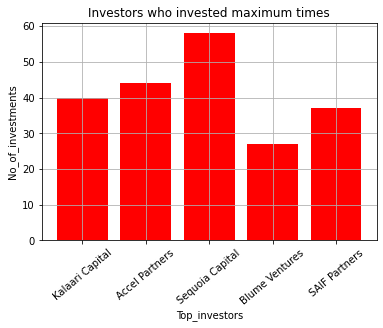

In [128]:
top_investors = list(investment_detail.keys())
no_of_investments = list(investment_detail.values())

plt.bar(top_investors,no_of_investments, color = 'r')
plt.grid(True)
plt.title('Investors who invested maximum times')
plt.xticks(rotation=40)
plt.xlabel('Top_investors')
plt.ylabel('No_of_investments')

plt.show()